# GeoSpatial Time Insights: Unraveling User Movement Patterns Through Advanced Signal Analysis

Date: 1/2/2023


Author: Yue Jian

- **Data Input**: We begin with a time series raw dataset capturing the trajectory of user signals over a specific period. These signals, intricate and rich in information about the specific location, time and user id, offer a glimpse into user behavior and movement patterns.

- **Objective**: Our primary goal is to delve deep into the Exploratory Data Analysis of these signal patterns. 
    - determine the most effective geohash level for accurate movement matching
    - identify 'jumping points' - instances where there is a significant movement over a brief period, so as to assess and validate the precision of Veraset's data
    
- **Context and Significance**: It can aid in everything from urban planning to personalized services. The right geohash index serves as a linchpin in unlocking these potentials.

- **Approach**: Our journey through the data will involve a variety of EDA techniques. We'll sift through patterns, identify anomalies, and discern correlations. This process is not just about numbers and graphs; it's about uncovering the stories hidden within the data.The steps are listed below
    - Data Cleaning:
        - Calculate each precision of geohash using lon and lat of each signal
        - Convert the signals into the moves given each user (a move contains start time and end time, start location geohash and end location geohash) and then calculate the distance and speed of each move
    - Bivariate Distribution Analysis: We'll start by plotting the bivariate distributions, focusing on the duration and distance of movements across different geohash levels. This will help us understand the relationship between these two variables in the context of geohash precision.
    - Geohash Level Comparison: We will calculate the proportion of movements between different geohash levels. Given that a move at geohash9 level is inherently included in geohash5, 6, 7, and 8 levels, our focus will be on movements that are exclusive to a single geohash level. This analysis aims to pinpoint the geohash level where most distinct movements occur.
    - Jumping Moves Analysis: Next, we will calculate the proportion of 'jumping moves' relative to all movements recorded. This will give us an insight into the frequency and distribution of such moves.

- **Challenges and Questions**: Navigating through this complex data is not without its challenges. Key questions include: How do different geohash indices affect the interpretation of movement? What insights can be gleaned about user behavior from these patterns? The answers may redefine our understanding of movement in a digital space.

# Data Cleaning

In [1]:
from datetime import datetime
import pandas as pd
import transbigdata as tbd
import geopandas as gpd
data=pd.read_csv(r"C:\Users\10124\Desktop\triptrain\raw_ping\all.csv")
data['Time'] = pd.to_datetime(data['utc_timestamp'], unit='s')
data.sort_values(["caid", "utc_timestamp"])

for precision in range(5, 9):
    column_name = f'geo_hash{precision}'
    data[column_name] = tbd.geohash_encode(data['longitude'], data['latitude'], precision=precision)

data

,utc_timestamp,caid,geo_hash,latitude,longitude,Time,geo_hash8,geo_hash7,geo_hash6,geo_hash5
0,1634956774,2b65009b977cb6e68e389a1be81b9331e0e1eb12243f86...,9q9nt8tn6,37.708908,-122.095093,2021-10-23 02:39:34,9q9nt8tn,9q9nt8t,9q9nt8,9q9nt
1,1634921582,47508555d4b3a4abe55bc805a8a7fb70206099f8e40e25...,9tbp63ves,33.628410,-112.393380,2021-10-22 16:53:02,9tbp63ve,9tbp63v,9tbp63,9tbp6
2,1635023736,2b65009b977cb6e68e389a1be81b9331e0e1eb12243f86...,9q9nt8tn6,37.708908,-122.095093,2021-10-23 21:15:36,9q9nt8tn,9q9nt8t,9q9nt8,9q9nt
3,1634949670,362e0547f813165294bde365d8ade588d3533d4af6614e...,9qcdvhgqf,38.479430,-121.416340,2021-10-23 00:41:10,9qcdvhgq,9qcdvhg,9qcdvh,9qcdv
4,1634864515,e6ae0cbe8486f7c403166efdfe41948c22c13816cf42ad...,9q9yr45z6,37.673370,-120.976181,2021-10-22 01:01:55,9q9yr45z,9q9yr45,9q9yr4,9q9yr
...,...,...,...,...,...,...,...,...,...,...
13592767,1633805871,fdb4469970aa2bb26fdbea32a0322c28f7655f8e8ec4d9...,9q5cm1zpu,33.980670,-118.247010,2021-10-09 18:57:51,9q5cm1zp,9q5cm1z,9q5cm1,9q5cm
13592768,1634814567,fdb4469970aa2bb26fdbea32a0322c28f7655f8e8ec4d9...,9q5cm4nch,33.980890,-118.247360,2021-10-21 11:09:27,9q5cm4nc,9q5cm4n,9q5cm4,9q5cm
13592769,1634814881,fdb4469970aa2bb26fdbea32a0322c28f7655f8e8ec4d9...,9q5cm4nbt,33.980804,-118.247315,2021-10-21 11:14:41,9q5cm4nb,9q5cm4n,9q5cm4,9q5cm
13592770,1634936235,fdb4469970aa2bb26fdbea32a0322c28f7655f8e8ec4d9...,9q5cm4p0s,33.980804,-118.247022,2021-10-22 20:57:15,9q5cm4p0,9q5cm4p,9q5cm4,9q5cm


In [6]:
data.to_csv(r"C:\Users\10124\Desktop\triptrain\raw_ping\data_all_geohash.csv")

In [2]:
import pandas as pd
data=pd.read_csv(r"C:\Users\10124\Desktop\triptrain\raw_ping\data_all_geohash.csv")
data=data.sort_values(["caid", "utc_timestamp"])
data

,Unnamed: 0,utc_timestamp,caid,geo_hash,latitude,longitude,Time,geo_hash8,geo_hash7,geo_hash6,geo_hash5
356758,356758,1632794892,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987180,2021-09-28 02:08:12,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8
4253704,4253704,1632794895,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 02:08:15,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8
9905036,9905036,1632794900,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987180,2021-09-28 02:08:20,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8
11013393,11013393,1632794901,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 02:08:21,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8
8231292,8231292,1632794958,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987190,2021-09-28 02:09:18,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8
...,...,...,...,...,...,...,...,...,...,...,...
4299278,4299278,1635550015,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbmb0w,34.968208,-89.988729,2021-10-29 23:26:55,dn0nbmb0,dn0nbmb,dn0nbm,dn0nb
9820174,9820174,1635551194,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbq374,34.971410,-89.987210,2021-10-29 23:46:34,dn0nbq37,dn0nbq3,dn0nbq,dn0nb
10985195,10985195,1635551203,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbq373,34.971420,-89.987220,2021-10-29 23:46:43,dn0nbq37,dn0nbq3,dn0nbq,dn0nb
4441867,4441867,1635551209,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbq374,34.971390,-89.987190,2021-10-29 23:46:49,dn0nbq37,dn0nbq3,dn0nbq,dn0nb


In [3]:
#find out the move dataset of geohash_5
import transbigdata as tbd
move5=data.copy()
move5=move5.sort_values(["caid", "utc_timestamp"])
move5=move5.rename(columns={'Time':'stime'})
move5['etime'] = move5['stime'].shift(-1)
move5['end_geohash5']=move5['geo_hash5'].shift(-1)
move5['end_lat']=move5['latitude'].shift(-1)
move5['end_lon']=move5['longitude'].shift(-1)
move5['status_id'] = ((move5['geo_hash5'] == move5['end_geohash5'])).astype(int)
move5=move5.loc[move5['status_id'] == 0]
move5 = move5[move5['caid'] == move5['caid'].shift(-1)].copy()

#calculate the duration and distance
move5['duration'] = (pd.to_datetime(move5['etime']) -pd.to_datetime(move5['stime'])).dt.total_seconds()
move5['distance'] = tbd.getdistance(move5['longitude'],move5['latitude'], move5['end_lon'],move5['end_lat'])
move5['duration_min'] = move5['duration'].map(lambda x: x/60)   
move5['distance_km'] = move5['distance'].map(lambda x: x/1000)   
move5

,Unnamed: 0,utc_timestamp,caid,geo_hash,latitude,longitude,stime,geo_hash8,geo_hash7,geo_hash6,geo_hash5,etime,end_geohash5,end_lat,end_lon,status_id,duration,distance,duration_min,distance_km
290586,290586,1632799728,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:28:48,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:29:16,9q9k9,37.386500,-121.941700,0,28.0,4028.031681,0.466667,4.028032
5794349,5794349,1632799766,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:29:26,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:29:44,9q9k8,37.389150,-121.987170,0,18.0,4028.103478,0.300000,4.028103
4393161,4393161,1632799805,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389160,-121.987180,2021-09-28 03:30:05,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:30:23,9q9k9,37.386502,-121.941699,0,18.0,4029.065755,0.300000,4.029066
1580026,1580026,1632799823,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:30:23,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:34:12,9q9k8,37.389150,-121.987170,0,229.0,4028.103478,3.816667,4.028103
85051,85051,1632801530,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:58:50,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 22:36:04,9q9hx,37.392100,-121.994210,0,67034.0,703.156336,1117.233333,0.703156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241936,4241936,1635546024,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypy116u2,34.812310,-90.303810,2021-10-29 22:20:24,9ypy116u,9ypy116,9ypy11,9ypy1,2021-10-29 22:25:56,9ypvc,34.800000,-90.280000,0,332.0,2568.921963,5.533333,2.568922
6913520,6913520,1635546356,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:25:56,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 22:35:23,dn0nb,34.972198,-89.990898,0,567.0,32588.087128,9.450000,32.588087
375145,375145,1635546923,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbnqxu,34.972198,-89.990898,2021-10-29 22:35:23,dn0nbnqx,dn0nbnq,dn0nbn,dn0nb,2021-10-29 22:47:15,9ypvc,34.800000,-90.280000,0,712.0,32588.087128,11.866667,32.588087
287467,287467,1635548202,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:56:42,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 23:26:02,dn0nb,34.968220,-89.988740,0,1760.0,32491.441831,29.333333,32.491442


In [29]:
#calculate the total number of move in the accuracy of geohash5
import numpy as np
move5_v=move5.copy()
move5_v['speed_kmh'] = move5_v.apply(lambda x :(x['distance']/x['duration'])*3.6 if x['duration']!=0 else np.nan,axis=1)
move5_jump=move5_v['speed_kmh']>500
print(move5_jump.sum())
print(move5_jump.sum()/len(move5))

97816
0.5263735672388742


In [19]:
#find out the move dataset of geohash_6
move6=data.copy()
move6=move6.sort_values(["caid", "utc_timestamp"])
move6=move6.rename(columns={'Time':'stime'})
move6['etime'] = move6['stime'].shift(-1)
move6['end_geohash6']=move6['geo_hash6'].shift(-1)
move6['end_lat']=move6['latitude'].shift(-1)
move6['end_lon']=move6['longitude'].shift(-1)
move6['status_id'] = ((move6['geo_hash6'] == move6['end_geohash6'])).astype(int)
move6=move6.loc[move6['status_id'] == 0]
move6 = move6[move6['caid'] == move6['caid'].shift(-1)].copy()

#calculate the duration
move6['duration'] = (pd.to_datetime(move6['etime']) -pd.to_datetime(move6['stime'])).dt.total_seconds()
move6['distance'] = tbd.getdistance(move6['longitude'],move6['latitude'], move6['end_lon'],move6['end_lat'])
move6['duration_min'] = move6['duration'].map(lambda x: x/60)   
move6['distance_km'] = move6['distance'].map(lambda x: x/1000)   
move6

,Unnamed: 0,utc_timestamp,caid,geo_hash,latitude,longitude,stime,geo_hash8,geo_hash7,geo_hash6,geo_hash5,etime,end_geohash6,end_lat,end_lon,status_id,duration,distance,duration_min,distance_km
290586,290586,1632799728,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:28:48,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:29:16,9q9k9n,37.386500,-121.941700,0,28.0,4028.031681,0.466667,4.028032
5794349,5794349,1632799766,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:29:26,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:29:44,9q9k8n,37.389150,-121.987170,0,18.0,4028.103478,0.300000,4.028103
4393161,4393161,1632799805,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389160,-121.987180,2021-09-28 03:30:05,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:30:23,9q9k9n,37.386502,-121.941699,0,18.0,4029.065755,0.300000,4.029066
1580026,1580026,1632799823,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:30:23,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:34:12,9q9k8n,37.389150,-121.987170,0,229.0,4028.103478,3.816667,4.028103
9685882,9685882,1632800061,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987180,2021-09-28 03:34:21,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:43:14,9q9k8m,37.385459,-121.970992,0,533.0,1487.930621,8.883333,1.487931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913520,6913520,1635546356,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:25:56,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 22:35:23,dn0nbn,34.972198,-89.990898,0,567.0,32588.087128,9.450000,32.588087
375145,375145,1635546923,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbnqxu,34.972198,-89.990898,2021-10-29 22:35:23,dn0nbnqx,dn0nbnq,dn0nbn,dn0nb,2021-10-29 22:47:15,9ypvcx,34.800000,-90.280000,0,712.0,32588.087128,11.866667,32.588087
287467,287467,1635548202,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:56:42,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 23:26:02,dn0nbm,34.968220,-89.988740,0,1760.0,32491.441831,29.333333,32.491442
4299278,4299278,1635550015,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbmb0w,34.968208,-89.988729,2021-10-29 23:26:55,dn0nbmb0,dn0nbmb,dn0nbm,dn0nb,2021-10-29 23:46:34,dn0nbq,34.971410,-89.987210,0,1179.0,382.002864,19.650000,0.382003


In [20]:
#calculate the total number of move in the accuracy of geohash6
import numpy as np
move6_v=move6.copy()
move6_v['speed_kmh'] = move6_v.apply(lambda x :(x['distance']/x['duration'])*3.6 if x['duration']!=0 else np.nan,axis=1)
move6_jump=move6_v['speed_kmh']>500
print(move6_jump.sum())
print(move6_jump.sum()/len(move6))

115382
0.36930039624368666


In [6]:
#find out the move dataset of geohash_7
import transbigdata as tbd
move7=data.copy()
move7=move7.sort_values(["caid", "utc_timestamp"])
move7=move7.rename(columns={'Time':'stime'})
move7['etime'] = move7['stime'].shift(-1)
move7['end_geohash7']=move7['geo_hash7'].shift(-1)
move7['end_lat']=move7['latitude'].shift(-1)
move7['end_lon']=move7['longitude'].shift(-1)
move7['status_id'] = ((move7['geo_hash7'] == move7['end_geohash7'])).astype(int)
move7=move7.loc[move7['status_id'] == 0]
move7 = move7[move7['caid'] == move7['caid'].shift(-1)].copy()

#calculate the duration
move7['duration'] = (pd.to_datetime(move7['etime']) -pd.to_datetime(move7['stime'])).dt.total_seconds()
move7['distance'] = tbd.getdistance(move7['longitude'],move7['latitude'], move7['end_lon'],move7['end_lat'])
move7['duration_min'] = move7['duration'].map(lambda x: x/60)   
move7['distance_km'] = move7['distance'].map(lambda x: x/1000)   
move7

,Unnamed: 0,utc_timestamp,caid,geo_hash,latitude,longitude,stime,geo_hash8,geo_hash7,geo_hash6,geo_hash5,etime,end_geohash7,end_lat,end_lon,status_id,duration,distance,duration_min,distance_km
290586,290586,1632799728,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:28:48,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:29:16,9q9k9nh,37.386500,-121.941700,0,28.0,4028.031681,0.466667,4.028032
5794349,5794349,1632799766,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:29:26,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:29:44,9q9k8n7,37.389150,-121.987170,0,18.0,4028.103478,0.300000,4.028103
4393161,4393161,1632799805,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389160,-121.987180,2021-09-28 03:30:05,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:30:23,9q9k9nh,37.386502,-121.941699,0,18.0,4029.065755,0.300000,4.029066
1580026,1580026,1632799823,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:30:23,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:34:12,9q9k8n7,37.389150,-121.987170,0,229.0,4028.103478,3.816667,4.028103
9685882,9685882,1632800061,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987180,2021-09-28 03:34:21,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:43:14,9q9k8mz,37.385459,-121.970992,0,533.0,1487.930621,8.883333,1.487931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913520,6913520,1635546356,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:25:56,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 22:35:23,dn0nbnq,34.972198,-89.990898,0,567.0,32588.087128,9.450000,32.588087
375145,375145,1635546923,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbnqxu,34.972198,-89.990898,2021-10-29 22:35:23,dn0nbnqx,dn0nbnq,dn0nbn,dn0nb,2021-10-29 22:47:15,9ypvcxh,34.800000,-90.280000,0,712.0,32588.087128,11.866667,32.588087
287467,287467,1635548202,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:56:42,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 23:26:02,dn0nbmb,34.968220,-89.988740,0,1760.0,32491.441831,29.333333,32.491442
4299278,4299278,1635550015,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbmb0w,34.968208,-89.988729,2021-10-29 23:26:55,dn0nbmb0,dn0nbmb,dn0nbm,dn0nb,2021-10-29 23:46:34,dn0nbq3,34.971410,-89.987210,0,1179.0,382.002864,19.650000,0.382003


In [7]:
#calculate the total number of move in the accuracy of geohash7
import numpy as np
move7_v=move7.copy()
move7_v['speed_kmh'] = move7_v.apply(lambda x :(x['distance']/x['duration'])*3.6 if x['duration']!=0 else np.nan,axis=1)
move7_jump=move7_v['speed_kmh']>300
print(move7_jump.sum())
print(move7_jump.sum()/len(move7))

138739
0.2128878318244591


In [4]:
#find out the move dataset of geohash_8
import transbigdata as tbd
move8=data.copy()
move8=move8.sort_values(["caid", "utc_timestamp"])
move8=move8.rename(columns={'Time':'stime'})
move8['etime'] = move8['stime'].shift(-1)
move8['end_geohash8']=move8['geo_hash8'].shift(-1)
move8['end_lat']=move8['latitude'].shift(-1)
move8['end_lon']=move8['longitude'].shift(-1)
move8['status_id'] = ((move8['geo_hash8'] == move8['end_geohash8'])).astype(int)
move8=move8.loc[move8['status_id'] == 0]
move8 = move8[move8['caid'] == move8['caid'].shift(-1)].copy()

#calculate the duration
move8['duration'] = (pd.to_datetime(move8['etime']) -pd.to_datetime(move8['stime'])).dt.total_seconds()
move8['distance'] = tbd.getdistance(move8['longitude'],move8['latitude'], move8['end_lon'],move8['end_lat'])
move8['duration_min'] = move8['duration'].map(lambda x: x/60)   
move8['distance_km'] = move8['distance'].map(lambda x: x/1000)   
move8

,Unnamed: 0,utc_timestamp,caid,geo_hash,latitude,longitude,stime,geo_hash8,geo_hash7,geo_hash6,geo_hash5,etime,end_geohash8,end_lat,end_lon,status_id,duration,distance,duration_min,distance_km
290586,290586,1632799728,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:28:48,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:29:16,9q9k9nhb,37.386500,-121.941700,0,28.0,4028.031681,0.466667,4.028032
5794349,5794349,1632799766,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:29:26,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:29:44,9q9k8n7x,37.389150,-121.987170,0,18.0,4028.103478,0.300000,4.028103
4393161,4393161,1632799805,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389160,-121.987180,2021-09-28 03:30:05,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:30:23,9q9k9nhb,37.386502,-121.941699,0,18.0,4029.065755,0.300000,4.029066
1580026,1580026,1632799823,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:30:23,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:34:12,9q9k8n7x,37.389150,-121.987170,0,229.0,4028.103478,3.816667,4.028103
9685882,9685882,1632800061,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987180,2021-09-28 03:34:21,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:43:14,9q9k8mz6,37.385459,-121.970992,0,533.0,1487.930621,8.883333,1.487931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913520,6913520,1635546356,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:25:56,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 22:35:23,dn0nbnqx,34.972198,-89.990898,0,567.0,32588.087128,9.450000,32.588087
375145,375145,1635546923,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbnqxu,34.972198,-89.990898,2021-10-29 22:35:23,dn0nbnqx,dn0nbnq,dn0nbn,dn0nb,2021-10-29 22:47:15,9ypvcxhh,34.800000,-90.280000,0,712.0,32588.087128,11.866667,32.588087
287467,287467,1635548202,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:56:42,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 23:26:02,dn0nbmb0,34.968220,-89.988740,0,1760.0,32491.441831,29.333333,32.491442
4299278,4299278,1635550015,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbmb0w,34.968208,-89.988729,2021-10-29 23:26:55,dn0nbmb0,dn0nbmb,dn0nbm,dn0nb,2021-10-29 23:46:34,dn0nbq37,34.971410,-89.987210,0,1179.0,382.002864,19.650000,0.382003


In [5]:
#calculate the total number of move in the accuracy of geohash8
import numpy as np
move8_v=move8.copy()
move8_v['speed_kmh'] = move8_v.apply(lambda x :(x['distance']/x['duration'])*3.6 if x['duration']!=0 else np.nan,axis=1)
move8_jump=move8_v['speed_kmh']>300
print(move8_jump.sum())
print(move8_jump.sum()/len(move8))

138986
0.10669800884531146


# Bivariate Distribution Analysis

<Figure size 480x480 with 0 Axes>

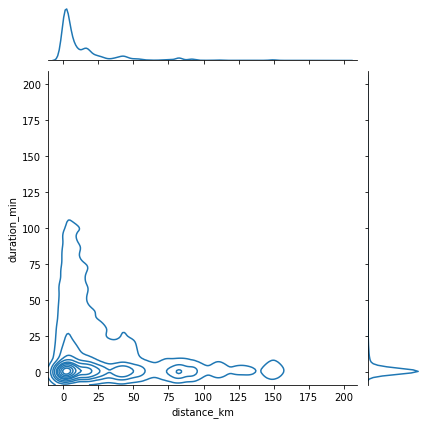

In [8]:
#draw the Kernel density
move_aj5=move5[(move5['duration_min']<=200)&(move5['distance_km']<=200)].copy()
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
sns.jointplot(x=move_aj5["distance_km"], y=move_aj5["duration_min"], kind='kde')
plt.show()

629574


<Figure size 480x480 with 0 Axes>

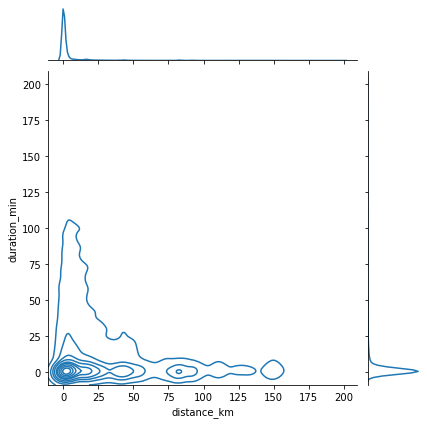

In [15]:
#draw the Kernel density
move_aj7=move7[(move7['duration_min']<=200)&(move7['distance_km']<=200)].copy()
print(len(move_aj7))
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
sns.jointplot(x=move_aj7["distance_km"], y=move_aj7["duration_min"], kind='kde')
plt.show()

629574


<Figure size 480x480 with 0 Axes>

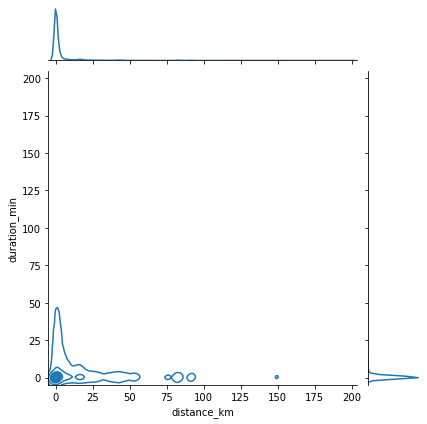

In [25]:
move_aj8=move8[(move8['duration_min']<=200)&(move8['distance_km']<=200)].copy()
print(len(move_aj8))
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
sns.jointplot(x=move_aj8["distance_km"], y=move_aj8["duration_min"], kind='kde')
plt.show()

<Figure size 480x480 with 0 Axes>

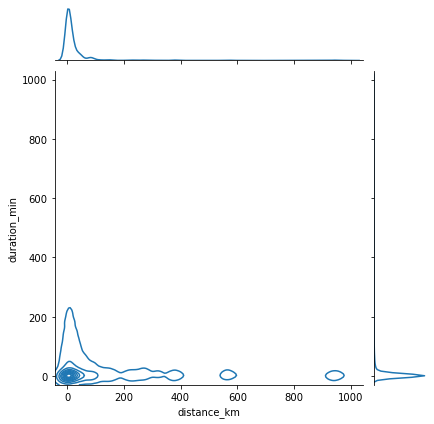

In [7]:
#draw the Kernel density
import matplotlib.pylab as plt
import seaborn as sns

move_aj5=move5[(move5['duration_min']<=1000)&(move5['distance_km']<=1000)].copy()
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
sns.jointplot(x=move_aj5["distance_km"], y=move_aj5["duration_min"], kind='kde')
plt.show()

## What share of all the moves are between different geohash levels?

In [3]:
import pandas as pd
data=pd.read_csv(r"C:\Users\10124\Desktop\triptrain\raw_ping\data_all_geohash.csv")
data

,Unnamed: 0,utc_timestamp,caid,geo_hash,latitude,longitude,Time,geo_hash8,geo_hash7,geo_hash6,geo_hash5
0,0,1634956774,2b65009b977cb6e68e389a1be81b9331e0e1eb12243f86...,9q9nt8tn6,37.708908,-122.095093,2021-10-23 02:39:34,9q9nt8tn,9q9nt8t,9q9nt8,9q9nt
1,1,1634921582,47508555d4b3a4abe55bc805a8a7fb70206099f8e40e25...,9tbp63ves,33.628410,-112.393380,2021-10-22 16:53:02,9tbp63ve,9tbp63v,9tbp63,9tbp6
2,2,1635023736,2b65009b977cb6e68e389a1be81b9331e0e1eb12243f86...,9q9nt8tn6,37.708908,-122.095093,2021-10-23 21:15:36,9q9nt8tn,9q9nt8t,9q9nt8,9q9nt
3,3,1634949670,362e0547f813165294bde365d8ade588d3533d4af6614e...,9qcdvhgqf,38.479430,-121.416340,2021-10-23 00:41:10,9qcdvhgq,9qcdvhg,9qcdvh,9qcdv
4,4,1634864515,e6ae0cbe8486f7c403166efdfe41948c22c13816cf42ad...,9q9yr45z6,37.673370,-120.976181,2021-10-22 01:01:55,9q9yr45z,9q9yr45,9q9yr4,9q9yr
...,...,...,...,...,...,...,...,...,...,...,...
13592767,13592767,1633805871,fdb4469970aa2bb26fdbea32a0322c28f7655f8e8ec4d9...,9q5cm1zpu,33.980670,-118.247010,2021-10-09 18:57:51,9q5cm1zp,9q5cm1z,9q5cm1,9q5cm
13592768,13592768,1634814567,fdb4469970aa2bb26fdbea32a0322c28f7655f8e8ec4d9...,9q5cm4nch,33.980890,-118.247360,2021-10-21 11:09:27,9q5cm4nc,9q5cm4n,9q5cm4,9q5cm
13592769,13592769,1634814881,fdb4469970aa2bb26fdbea32a0322c28f7655f8e8ec4d9...,9q5cm4nbt,33.980804,-118.247315,2021-10-21 11:14:41,9q5cm4nb,9q5cm4n,9q5cm4,9q5cm
13592770,13592770,1634936235,fdb4469970aa2bb26fdbea32a0322c28f7655f8e8ec4d9...,9q5cm4p0s,33.980804,-118.247022,2021-10-22 20:57:15,9q5cm4p0,9q5cm4p,9q5cm4,9q5cm


In [5]:
#change at geohash9 level but not at geohash8
#find out the move dataset of geohash_5
import transbigdata as tbd
move98=data.copy()
move98=move98.sort_values(["caid", "utc_timestamp"])
move98=move98.rename(columns={'Time':'stime'})
move98['etime'] = move98['stime'].shift(-1)
move98['end_geohash9']=move98['geo_hash'].shift(-1)
move98['end_geohash8']=move98['geo_hash8'].shift(-1)
move98['end_lat']=move98['latitude'].shift(-1)
move98['end_lon']=move98['longitude'].shift(-1)
move98['status_id'] = ((move98['geo_hash'] == move98['end_geohash9'])).astype(int)
move98=move98.loc[move98['status_id'] == 0]
move98 = move98[move98['caid'] == move98['caid'].shift(-1)].copy()

#calculate the duration and distance
#move98['duration'] = (pd.to_datetime(move98['etime']) -pd.to_datetime(move98['stime'])).dt.total_seconds()
#move98['distance'] = tbd.getdistance(move98['longitude'],move98['latitude'], move98['end_lon'],move98['end_lat'])
#move98['duration_min'] = move98['duration'].map(lambda x: x/60)   
#move98['distance_km'] = move98['distance'].map(lambda x: x/1000)   
move98

,Unnamed: 0,utc_timestamp,caid,geo_hash,latitude,longitude,stime,geo_hash8,geo_hash7,geo_hash6,geo_hash5,etime,end_geohash9,end_geohash8,end_lat,end_lon,status_id
5788161,5788161,1632799673,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:27:53,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:28:23,9q9k8n7xt,9q9k8n7x,37.389155,-121.987165,0
4102606,4102606,1632799703,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xt,37.389155,-121.987165,2021-09-28 03:28:23,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:28:38,9q9k8n7xs,9q9k8n7x,37.389160,-121.987180,0
290586,290586,1632799728,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:28:48,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:29:16,9q9k9nhb0,9q9k9nhb,37.386500,-121.941700,0
5794349,5794349,1632799766,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:29:26,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:29:44,9q9k8n7xs,9q9k8n7x,37.389150,-121.987170,0
4393161,4393161,1632799805,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389160,-121.987180,2021-09-28 03:30:05,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:30:23,9q9k9nhb0,9q9k9nhb,37.386502,-121.941699,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287467,287467,1635548202,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:56:42,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 23:26:02,dn0nbmb0w,dn0nbmb0,34.968220,-89.988740,0
4299278,4299278,1635550015,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbmb0w,34.968208,-89.988729,2021-10-29 23:26:55,dn0nbmb0,dn0nbmb,dn0nbm,dn0nb,2021-10-29 23:46:34,dn0nbq374,dn0nbq37,34.971410,-89.987210,0
9820174,9820174,1635551194,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbq374,34.971410,-89.987210,2021-10-29 23:46:34,dn0nbq37,dn0nbq3,dn0nbq,dn0nb,2021-10-29 23:46:43,dn0nbq373,dn0nbq37,34.971420,-89.987220,0
10985195,10985195,1635551203,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbq373,34.971420,-89.987220,2021-10-29 23:46:43,dn0nbq37,dn0nbq3,dn0nbq,dn0nb,2021-10-29 23:46:49,dn0nbq374,dn0nbq37,34.971390,-89.987190,0


In [8]:
move98_num=len(move98[move98['geo_hash8']==move98['end_geohash8']])
move98_num

1532721

In [9]:
#change at geohash8 level but not at geohash7
#find out the move dataset of geohash_5
import transbigdata as tbd
move87=data.copy()
move87=move87.sort_values(["caid", "utc_timestamp"])
move87=move87.rename(columns={'Time':'stime'})
move87['etime'] = move87['stime'].shift(-1)
move87['end_geohash7']=move87['geo_hash7'].shift(-1)
move87['end_geohash8']=move87['geo_hash8'].shift(-1)
move87['end_lat']=move87['latitude'].shift(-1)
move87['end_lon']=move87['longitude'].shift(-1)
move87['status_id'] = ((move87['geo_hash8'] == move87['end_geohash8'])).astype(int)
move87=move87.loc[move87['status_id'] == 0]
move87 = move87[move87['caid'] == move87['caid'].shift(-1)].copy()

#calculate the duration and distance
#move98['duration'] = (pd.to_datetime(move98['etime']) -pd.to_datetime(move98['stime'])).dt.total_seconds()
#move98['distance'] = tbd.getdistance(move98['longitude'],move98['latitude'], move98['end_lon'],move98['end_lat'])
#move98['duration_min'] = move98['duration'].map(lambda x: x/60)   
#move98['distance_km'] = move98['distance'].map(lambda x: x/1000)   
move87

,Unnamed: 0,utc_timestamp,caid,geo_hash,latitude,longitude,stime,geo_hash8,geo_hash7,geo_hash6,geo_hash5,etime,end_geohash7,end_geohash8,end_lat,end_lon,status_id
290586,290586,1632799728,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:28:48,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:29:16,9q9k9nh,9q9k9nhb,37.386500,-121.941700,0
5794349,5794349,1632799766,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:29:26,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:29:44,9q9k8n7,9q9k8n7x,37.389150,-121.987170,0
4393161,4393161,1632799805,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389160,-121.987180,2021-09-28 03:30:05,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:30:23,9q9k9nh,9q9k9nhb,37.386502,-121.941699,0
1580026,1580026,1632799823,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:30:23,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:34:12,9q9k8n7,9q9k8n7x,37.389150,-121.987170,0
9685882,9685882,1632800061,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987180,2021-09-28 03:34:21,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:43:14,9q9k8mz,9q9k8mz6,37.385459,-121.970992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913520,6913520,1635546356,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:25:56,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 22:35:23,dn0nbnq,dn0nbnqx,34.972198,-89.990898,0
375145,375145,1635546923,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbnqxu,34.972198,-89.990898,2021-10-29 22:35:23,dn0nbnqx,dn0nbnq,dn0nbn,dn0nb,2021-10-29 22:47:15,9ypvcxh,9ypvcxhh,34.800000,-90.280000,0
287467,287467,1635548202,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:56:42,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 23:26:02,dn0nbmb,dn0nbmb0,34.968220,-89.988740,0
4299278,4299278,1635550015,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbmb0w,34.968208,-89.988729,2021-10-29 23:26:55,dn0nbmb0,dn0nbmb,dn0nbm,dn0nb,2021-10-29 23:46:34,dn0nbq3,dn0nbq37,34.971410,-89.987210,0


In [11]:
move87_num=len(move87[move87['geo_hash7']==move87['end_geohash7']])
move87_num

650911

In [12]:
#change at geohash7 level but not at geohash6
#find out the move dataset of geohash_5
import transbigdata as tbd
move76=data.copy()
move76=move76.sort_values(["caid", "utc_timestamp"])
move76=move76.rename(columns={'Time':'stime'})
move76['etime'] = move76['stime'].shift(-1)
move76['end_geohash6']=move76['geo_hash6'].shift(-1)
move76['end_geohash7']=move76['geo_hash7'].shift(-1)
move76['end_lat']=move76['latitude'].shift(-1)
move76['end_lon']=move76['longitude'].shift(-1)
move76['status_id'] = ((move76['geo_hash7'] == move76['end_geohash7'])).astype(int)
move76=move76.loc[move76['status_id'] == 0]
move76 = move76[move76['caid'] == move76['caid'].shift(-1)].copy()
  
move76

,Unnamed: 0,utc_timestamp,caid,geo_hash,latitude,longitude,stime,geo_hash8,geo_hash7,geo_hash6,geo_hash5,etime,end_geohash6,end_geohash7,end_lat,end_lon,status_id
290586,290586,1632799728,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:28:48,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:29:16,9q9k9n,9q9k9nh,37.386500,-121.941700,0
5794349,5794349,1632799766,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:29:26,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:29:44,9q9k8n,9q9k8n7,37.389150,-121.987170,0
4393161,4393161,1632799805,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389160,-121.987180,2021-09-28 03:30:05,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:30:23,9q9k9n,9q9k9nh,37.386502,-121.941699,0
1580026,1580026,1632799823,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:30:23,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:34:12,9q9k8n,9q9k8n7,37.389150,-121.987170,0
9685882,9685882,1632800061,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987180,2021-09-28 03:34:21,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:43:14,9q9k8m,9q9k8mz,37.385459,-121.970992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913520,6913520,1635546356,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:25:56,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 22:35:23,dn0nbn,dn0nbnq,34.972198,-89.990898,0
375145,375145,1635546923,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbnqxu,34.972198,-89.990898,2021-10-29 22:35:23,dn0nbnqx,dn0nbnq,dn0nbn,dn0nb,2021-10-29 22:47:15,9ypvcx,9ypvcxh,34.800000,-90.280000,0
287467,287467,1635548202,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:56:42,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 23:26:02,dn0nbm,dn0nbmb,34.968220,-89.988740,0
4299278,4299278,1635550015,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbmb0w,34.968208,-89.988729,2021-10-29 23:26:55,dn0nbmb0,dn0nbmb,dn0nbm,dn0nb,2021-10-29 23:46:34,dn0nbq,dn0nbq3,34.971410,-89.987210,0


In [13]:
move76_num=len(move76[move76['geo_hash6']==move76['end_geohash6']])
move76_num

339266

In [17]:
#change at geohash6 level but not at geohash5
#find out the move dataset of geohash_5
import transbigdata as tbd
move65=data.copy()
move65=move65.sort_values(["caid", "utc_timestamp"])
move65=move65.rename(columns={'Time':'stime'})
move65['etime'] = move65['stime'].shift(-1)
move65['end_geohash5']=move65['geo_hash5'].shift(-1)
move65['end_geohash6']=move65['geo_hash6'].shift(-1)
move65['end_lat']=move65['latitude'].shift(-1)
move65['end_lon']=move65['longitude'].shift(-1)
move65['status_id'] = ((move65['geo_hash6'] == move65['end_geohash6'])).astype(int)
move65=move65.loc[move65['status_id'] == 0]
move65 = move65[move65['caid'] == move65['caid'].shift(-1)].copy()

move65

,Unnamed: 0,utc_timestamp,caid,geo_hash,latitude,longitude,stime,geo_hash8,geo_hash7,geo_hash6,geo_hash5,etime,end_geohash5,end_geohash6,end_lat,end_lon,status_id
290586,290586,1632799728,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:28:48,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:29:16,9q9k9,9q9k9n,37.386500,-121.941700,0
5794349,5794349,1632799766,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:29:26,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:29:44,9q9k8,9q9k8n,37.389150,-121.987170,0
4393161,4393161,1632799805,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389160,-121.987180,2021-09-28 03:30:05,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:30:23,9q9k9,9q9k9n,37.386502,-121.941699,0
1580026,1580026,1632799823,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:30:23,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:34:12,9q9k8,9q9k8n,37.389150,-121.987170,0
9685882,9685882,1632800061,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987180,2021-09-28 03:34:21,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:43:14,9q9k8,9q9k8m,37.385459,-121.970992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913520,6913520,1635546356,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:25:56,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 22:35:23,dn0nb,dn0nbn,34.972198,-89.990898,0
375145,375145,1635546923,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbnqxu,34.972198,-89.990898,2021-10-29 22:35:23,dn0nbnqx,dn0nbnq,dn0nbn,dn0nb,2021-10-29 22:47:15,9ypvc,9ypvcx,34.800000,-90.280000,0
287467,287467,1635548202,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:56:42,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 23:26:02,dn0nb,dn0nbm,34.968220,-89.988740,0
4299278,4299278,1635550015,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbmb0w,34.968208,-89.988729,2021-10-29 23:26:55,dn0nbmb0,dn0nbmb,dn0nbm,dn0nb,2021-10-29 23:46:34,dn0nb,dn0nbq,34.971410,-89.987210,0


In [18]:
move65_num=len(move65[move65['geo_hash5']==move65['end_geohash5']])
move65_num

126604

In [19]:
#calculating the total number of moves at geohash9 level
#find out the move dataset of geohash_5
import transbigdata as tbd
move9=data.copy()
move9=move9.sort_values(["caid", "utc_timestamp"])
move9=move9.rename(columns={'Time':'stime'})
move9['etime'] = move9['stime'].shift(-1)
move9['end_geohash9']=move9['geo_hash'].shift(-1)
move9['end_lat']=move9['latitude'].shift(-1)
move9['end_lon']=move9['longitude'].shift(-1)
move9['status_id'] = ((move9['geo_hash'] == move9['end_geohash9'])).astype(int)
move9=move9.loc[move9['status_id'] == 0]
move9 = move9[move9['caid'] == move9['caid'].shift(-1)].copy()
 
move9

,Unnamed: 0,utc_timestamp,caid,geo_hash,latitude,longitude,stime,geo_hash8,geo_hash7,geo_hash6,geo_hash5,etime,end_geohash9,end_lat,end_lon,status_id
5788161,5788161,1632799673,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:27:53,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:28:23,9q9k8n7xt,37.389155,-121.987165,0
4102606,4102606,1632799703,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xt,37.389155,-121.987165,2021-09-28 03:28:23,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:28:38,9q9k8n7xs,37.389160,-121.987180,0
290586,290586,1632799728,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389150,-121.987170,2021-09-28 03:28:48,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:29:16,9q9k9nhb0,37.386500,-121.941700,0
5794349,5794349,1632799766,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k9nhb0,37.386502,-121.941699,2021-09-28 03:29:26,9q9k9nhb,9q9k9nh,9q9k9n,9q9k9,2021-09-28 03:29:44,9q9k8n7xs,37.389150,-121.987170,0
4393161,4393161,1632799805,00c374f15cc90da0cde6f3c671def0d8553b488491e085...,9q9k8n7xs,37.389160,-121.987180,2021-09-28 03:30:05,9q9k8n7x,9q9k8n7,9q9k8n,9q9k8,2021-09-28 03:30:23,9q9k9nhb0,37.386502,-121.941699,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287467,287467,1635548202,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,9ypvcxhhe,34.800000,-90.280000,2021-10-29 22:56:42,9ypvcxhh,9ypvcxh,9ypvcx,9ypvc,2021-10-29 23:26:02,dn0nbmb0w,34.968220,-89.988740,0
4299278,4299278,1635550015,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbmb0w,34.968208,-89.988729,2021-10-29 23:26:55,dn0nbmb0,dn0nbmb,dn0nbm,dn0nb,2021-10-29 23:46:34,dn0nbq374,34.971410,-89.987210,0
9820174,9820174,1635551194,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbq374,34.971410,-89.987210,2021-10-29 23:46:34,dn0nbq37,dn0nbq3,dn0nbq,dn0nb,2021-10-29 23:46:43,dn0nbq373,34.971420,-89.987220,0
10985195,10985195,1635551203,fed5675f2b50c19ed589bac35d2afc9fecbeea93f5d6b3...,dn0nbq373,34.971420,-89.987220,2021-10-29 23:46:43,dn0nbq37,dn0nbq3,dn0nbq,dn0nb,2021-10-29 23:46:49,dn0nbq374,34.971390,-89.987190,0


In [22]:
print(move98_num/(move98_num+move87_num+move76_num+move65_num+185830))
print(move87_num/(move98_num+move87_num+move76_num+move65_num+185830))
print(move76_num/(move98_num+move87_num+move76_num+move65_num+185830))
print(move65_num/(move98_num+move87_num+move76_num+move65_num+185830))
print(185830/(move98_num+move87_num+move76_num+move65_num+185830))

0.5405790221392063
0.2295713517852583
0.11965653404962805
0.04465226647179237
0.065540825554115


# Geohash Level Comparison

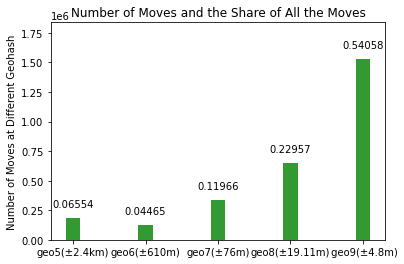

In [30]:
import matplotlib.pyplot as plt


def bar_with_percentage_plot(x_list, y_list):


    plt.bar(range(len(x_list)), y_list, 0.2, color='g', alpha=0.8)

    plt.ylabel('Number of Moves at Different Geohash')


    plt.title('Number of Moves and the Share of All the Moves')


    plt.xticks(range(len(x_list)), x_list)


    y_max = max(y_list) + max(y_list) / 5
    plt.ylim([0, y_max])

    y_sum = sum(y_list)
    total = len(move9)
    percentage = [185830/total,move65_num/total,move76_num/total,move87_num/total,move98_num/total]


    for x, y in enumerate(y_list):
        plt.text(x, y + y_max / 20, str(round(percentage[x], 5)), ha='center')


    plt.show()


if __name__ == '__main__':
    x_list = ["geo5(±2.4km)","geo6(±610m)", "geo7(±76m)", "geo8(±19.11m)"," geo9(±4.8m)"]
    y_list = [185830,move65_num,move76_num,move87_num,move98_num]
    bar_with_percentage_plot(x_list, y_list)

## What share of all the moves are “jumps”? 

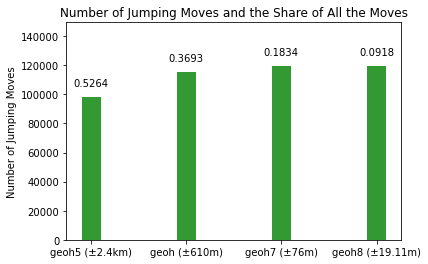

In [47]:
import matplotlib.pyplot as plt


def bar_with_percentage_plot(x_list, y_list):

    plt.bar(range(len(x_list)), y_list, 0.2, color='g', alpha=0.8)

    plt.ylabel('Number of Jumping Moves')

    plt.title('Number of Jumping Moves and the Share of All the Moves')

    plt.xticks(range(len(x_list)), x_list)

    y_max = max(y_list) + max(y_list) / 4
    plt.ylim([0, y_max])

    y_sum = sum(y_list)
    percentage = [move5_jump.sum()/len(move5),move6_jump.sum()/len(move6),move7_jump.sum()/len(move7),move8_jump.sum()/len(move8)]

    for x, y in enumerate(y_list):
        plt.text(x, y + y_max / 20, str(round(percentage[x], 4)), ha='center')

    plt.show()


if __name__ == '__main__':
    x_list = ["geoh5 (±2.4km)","geoh (±610m)", "geoh7 (±76m)", "geoh8 (±19.11m)"]
    y_list = [move5_jump.sum(),move6_jump.sum(),move7_jump.sum(),move8_jump.sum()]
    bar_with_percentage_plot(x_list, y_list)

# Conclusion

- **Jump Identification Criteria**: We define 'jumps' in movements as those with speeds exceeding 500 km/h. Under this criterion, approximately 18% of movements at the geohash-7 level qualify as 'jumps'. Lowering the speed threshold to 300 km/h increases this proportion to 21%. These findings suggest that the initial raw ping data may not be entirely accurate, indicating a need for further data cleansing.

- **Veraset's Approach to Jumps**: According to Veraset's whitepaper, their methodology for handling jumps involves calculating the speed of each movement. If a movement's speed exceeds a certain threshold, it is considered too fast and the corresponding pings are filtered out. This approach is consistent with our own criteria for identifying jumps.

- **Movement Frequency by Geohash Level**: Our analysis reveals that the frequency of exclusive movements at the geohash-8 level (which represents an area of approximately 20 meters) is five times higher than that at the exclusive geohash-6 level (covering roughly 1 kilometer). This suggests that most movements occur over shorter distances.